

Tải database



In [46]:

!pip install -q kaggle

from google.colab import drive
drive.mount('/content/drive')

! mkdir ~/.kaggle

!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

! chmod 600 ~/.kaggle/kaggle.json

%cd /content/drive/MyDrive/Dataset

! kaggle datasets download andrewmvd/face-mask-detection

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists
/content/drive/MyDrive/Dataset
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection
License(s): CC0-1.0
 98% 388M/398M [00:03<00:00, 60.8MB/s]
100% 398M/398M [00:03<00:00, 110MB/s] 


In [55]:
destination_dir = "/content/face-mask-detection/"
zip_file_path = "/content/drive/MyDrive/Dataset/face-mask-detection.zip"

# Check if the destination directory already exists
if not os.path.exists(destination_dir):
    print(f"Destination directory '{destination_dir}' not found. Unzipping the dataset.")
    # Use the !unzip command to extract the file
    get_ipython().system(f'unzip "{zip_file_path}" -d "{destination_dir}"')
else:
    print(f"Destination directory '{destination_dir}' already exists. Skipping unzip.")

Destination directory '/content/face-mask-detection/' already exists. Skipping unzip.


Review data

In [56]:
import pandas as pd

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil

from PIL import Image, ImageOps

In [51]:
with open('/content/face-mask-detection/annotations/maksssksksss99.xml') as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss99.png</filename>
    <size>
        <width>400</width>
        <height>267</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>mask_weared_incorrect</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>181</xmin>
            <ymin>54</ymin>
            <xmax>273</xmax>
            <ymax>162</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>99</xmin>
            <ymin>87</ymin>
            <xmax>176</xmax>
            <ymax>165</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncate

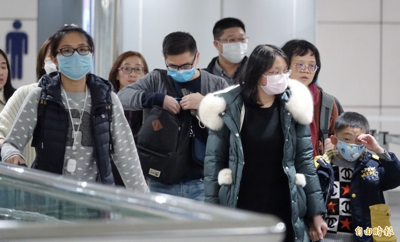

In [52]:
Image.open("/content/face-mask-detection/images/maksssksksss30.png")

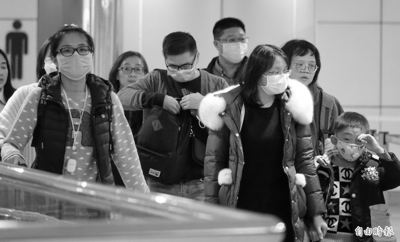

In [53]:
# Tạo im1
im1 = Image.open(r"/content/face-mask-detection/images/maksssksksss30.png")

# Áp dụng grayscale
im2 = ImageOps.grayscale(im1)

im2

Chuẩn bị dataset

In [71]:
#xml sang txt
def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h

    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h

    return [x_center, y_center, width, height]

def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center, width, height
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2

    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[0] * w) + h_half_len)

    return [xmin, ymin, xmax, ymax]

classes = []

input_dir = "/content/face-mask-detection/annotations"
output_dir = "/content/labels"
image_dir = "/content/face-mask-detection/images"

# Check if the output directory exists, create it only if it doesn't
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    print(f"Created directory: {output_dir}")
else:
    print(f"Directory already exists: {output_dir}. Skipping creation.")


import glob

files = glob.glob(os.path.join(input_dir, "*.xml"))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f"{filename}.png")):
        print(f"{filename} image does not exist!")
        continue

    result = []

    # Parse the content of the xml file
    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall("object"):
        label = obj.find("name").text

        # check for new classes and append to list
        if label not in classes:
            classes.append(label)
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)

        # convert data to string
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")

    if result:
        # generate a yolo format text file for each xml file
        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding = "utf-8") as f:
            f.write("\n".join(result))

# generate the classes file as reference
with open("/content/classes.txt", "w", encoding = "utf-8") as f:
    f.write(json.dumps(classes))

Directory already exists: /content/labels. Skipping creation.


In [72]:
with open('/content/classes.txt') as f:
    contents = f.read()
    print(contents)

["without_mask", "with_mask", "mask_weared_incorrect"]


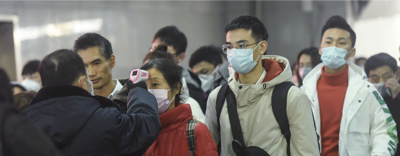

In [73]:
Image.open("/content/face-mask-detection/images/maksssksksss1.png")

In [60]:
#Xml từ maksssksksss1
with open('/content/face-mask-detection/annotations/maksssksksss1.xml') as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss1.png</filename>
    <size>
        <width>400</width>
        <height>156</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>321</xmin>
            <ymin>34</ymin>
            <xmax>354</xmax>
            <ymax>69</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>224</xmin>
            <ymin>38</ymin>
            <xmax>261</xmax>
            <ymax>73</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated

In [74]:
with open('/content/labels/maksssksksss0.txt') as f:
    contents = f.read()
    print(contents)
#txt từ maksssksksss1

0 0.18359375 0.337431693989071 0.05859375 0.10109289617486339
1 0.4013671875 0.3333333333333333 0.080078125 0.12021857923497267
0 0.6689453125 0.3155737704918033 0.068359375 0.13934426229508196


Create dataset

In [75]:
#Thư mục split
image_dir = '/content/face-mask-detection/images'
label_dir = '/content/face-mask-detection/labels'

train_dir = '/content/data/train'
val_dir = '/content/data/val'
test_dir = '/content/data/test'

#split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1 # This will be the remaining percentage

# Add ảnh vào list
metarial = []

for i in os.listdir("/content/face-mask-detection/images"):
    srt = i[:-4]
    metarial.append(srt)

# Shuffle the list of filenames
random.shuffle(metarial)

# Calculate the number of files for each split
train_size = int(len(metarial) * train_ratio)
val_size = int(len(metarial) * val_ratio)
test_size = len(metarial) - train_size - val_size # Ensure all files are included

# Split the filenames
train_files = metarial[:train_size]
val_files = metarial[train_size:train_size + val_size]
test_files = metarial[train_size + val_size:]

# Function to copy files
def copy_files(file_list, image_source_dir, label_source_dir, image_dest_dir, label_dest_dir):
    for filename in file_list:
        # Copy image file
        src_image_path = os.path.join(image_source_dir, f"{filename}.png")
        dest_image_path = os.path.join(image_dest_dir, f"{filename}.png")
        shutil.copyfile(src_image_path, dest_image_path)

        # Copy label file (handle cases where a label file might not exist for an image)
        src_label_path = os.path.join(label_source_dir, f"{filename}.txt")
        dest_label_path = os.path.join(label_dest_dir, f"{filename}.txt")
        if os.path.exists(src_label_path):
            shutil.copyfile(src_label_path, dest_label_path)


os.makedirs(os.path.join(train_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'labels'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'labels'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'labels'), exist_ok=True)


copy_files(train_files, image_dir, output_dir, os.path.join(train_dir, 'images'), os.path.join(train_dir, 'labels'))
copy_files(val_files, image_dir, output_dir, os.path.join(val_dir, 'images'), os.path.join(val_dir, 'labels'))
copy_files(test_files, image_dir, output_dir, os.path.join(test_dir, 'images'), os.path.join(test_dir, 'labels'))


print(f"Dataset split completed: {len(train_files)} training, {len(val_files)} validation, {len(test_files)} test files.")

Dataset split completed: 682 training, 85 validation, 86 test files.


In [76]:
metarial[0:10]

['maksssksksss249',
 'maksssksksss264',
 'maksssksksss492',
 'maksssksksss596',
 'maksssksksss68',
 'maksssksksss459',
 'maksssksksss640',
 'maksssksksss433',
 'maksssksksss544',
 'maksssksksss643']

In [77]:
train_images_path = './train/images'
val_images_path = './val/images'

# Số class
num_classes = len(classes)

# Tên class
class_list = classes

In [78]:
yaml_content = f"""

train: {train_images_path}
val: {val_images_path}
nc: {num_classes}
names: {class_list}
"""

print("YAML content:")
print(yaml_content)

YAML content:


train: ./train/images
val: ./val/images
nc: 3
names: ['without_mask', 'with_mask', 'mask_weared_incorrect']



In [79]:
yaml_file_path = '/content/data/dataset.yaml'

with open(yaml_file_path, 'w') as f:
    f.write(yaml_content)

print(f"YAML configuration file created at: {yaml_file_path}")

YAML configuration file created at: /content/data/dataset.yaml


Dowload model

In [80]:
%pip install --upgrade ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.9/107.7 GB disk)


Training

In [81]:
# /content/data
os.makedirs("/content/Result/", exist_ok=True)

%cd /content/Result/
!yolo train model=yolov8n.pt data=/content/data/dataset.yaml epochs=30 imgsz=640

/content/Result
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

Test

In [82]:
Image.open("/content/Result/runs/detect/train5/train_batch0.jpg")

Output hidden; open in https://colab.research.google.com to view.

In [83]:
!yolo predict model=/content/Result/runs/detect/train5/weights/best.pt source='/content/data/test/images'

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/231 /content/data/test/images/maksssksksss1.png: 256x640 1 without_mask, 7 with_masks, 99.9ms
image 2/231 /content/data/test/images/maksssksksss10.png: 640x512 1 with_mask, 178.8ms
image 3/231 /content/data/test/images/maksssksksss103.png: 480x640 4 with_masks, 158.4ms
image 4/231 /content/data/test/images/maksssksksss107.png: 640x512 1 with_mask, 153.1ms
image 5/231 /content/data/test/images/maksssksksss108.png: 384x640 1 without_mask, 6 with_masks, 143.9ms
image 6/231 /content/data/test/images/maksssksksss111.png: 448x640 2 without_masks, 9 with_masks, 135.7ms
image 7/231 /content/data/test/images/maksssksksss115.png: 448x640 9 with_masks, 134.6ms
image 8/231 /content/data/test/images/maksssksksss117.png: 640x512 1 with_mask, 154.9ms
image 9/231 /content/data/test/images/maksssksksss12.png: 448x640 4 without_masks, 12

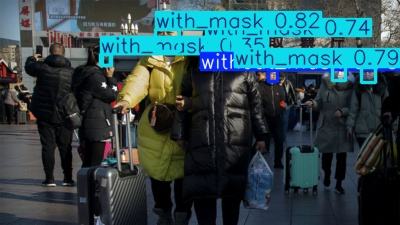

In [84]:
Image.open('/content/Result/runs/detect/predict/maksssksksss108.jpg')

In [85]:
%cd /content/Result
!yolo predict model=/content/Result/runs/detect/train5/weights/best.pt source='/content/deo-khau-trang-030920 (1).jpg'

/content/Result
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/deo-khau-trang-030920 (1).jpg: 448x640 4 with_masks, 153.4ms
Speed: 5.1ms preprocess, 153.4ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


Minh họa kết quả

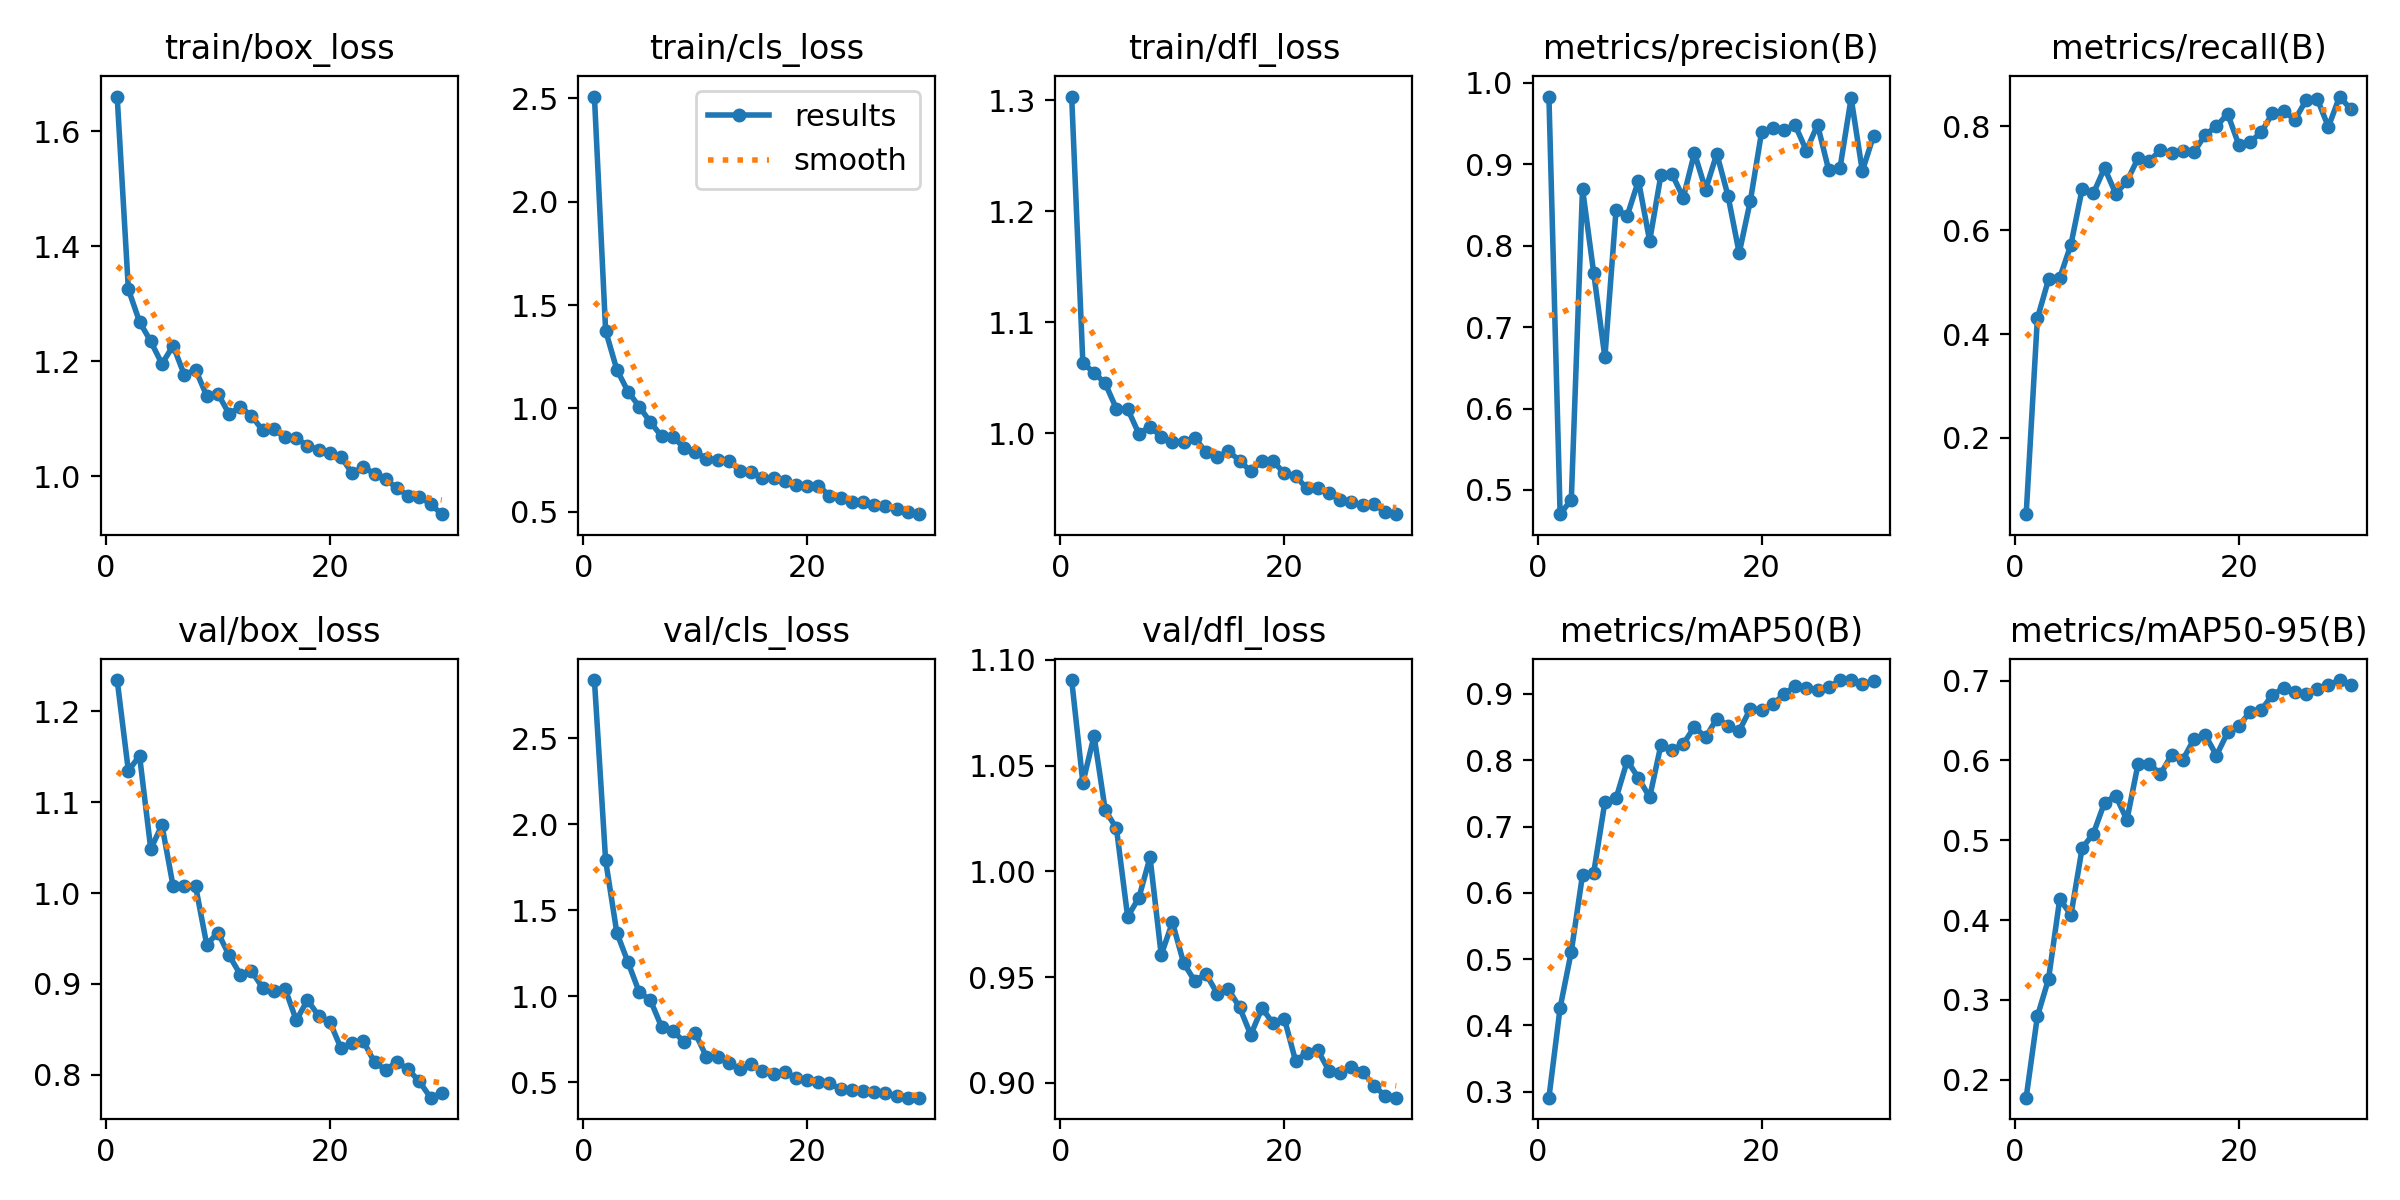

In [86]:
Image.open("/content/Result/runs/detect/train5/results.png")

In [87]:
import numpy as np
import torch
from ultralytics import YOLO
import os
import json
from PIL import Image


# --- Các biến và đường dẫn đã định nghĩa trước ---
best_model_path = "/content/Result/runs/detect/train5/weights/best.pt"
test_images_dir = '/content/data/test/images'
test_labels_dir = '/content/data/test/labels'
classes_file_path = '/content/classes.txt'

# Function to convert YOLO format (center_x, center_y, width, height) to xyxy format (xmin, ymin, xmax, ymax)
def yolo_to_xyxy(yolo_bbox, img_width, img_height):
    """
    Converts a YOLO format bounding box to xyxy format.

    Args:
        yolo_bbox (list or tuple): A list or tuple containing the bounding box in YOLO format (center_x, center_y, width, height),
                                   normalized between 0 and 1.
        img_width (int): The width of the image.
        img_height (int): The height of the image.

    Returns:
        list: A list containing the bounding box in xyxy format [xmin, ymin, xmax, ymax].
    """
    x_center, y_center, width, height = yolo_bbox

    xmin = int((x_center - width / 2) * img_width)
    ymin = int((y_center - height / 2) * img_height)
    xmax = int((x_center + width / 2) * img_width)
    ymax = int((y_center + height / 2) * img_height)

    return [xmin, ymin, xmax, ymax]


# --- Tải tên lớp ---
# Ensure class_list and num_classes are loaded if they were not defined in a previous cell
try:
    with open(classes_file_path, 'r', encoding='utf-8') as f:
        classes = json.load(f)
    class_list = classes
    num_classes = len(classes)
    print(f"Loaded {num_classes} classes: {class_list}")
except FileNotFoundError:
    print(f"Error: Classes file not found at {classes_file_path}")
    # Handle this error appropriately, maybe exit or raise an exception
    num_classes = 0 # Set to 0 to prevent further errors

# --- Tải model và chạy dự đoán ---
try:
    model = YOLO(best_model_path)
    # Run inference on the test dataset
    # Ensure the predict call is made to get the results
    # The source should be the directory containing the test images
    print(f"Running prediction on test images from: {test_images_dir}")
    results = model.predict(source=test_images_dir, verbose=False) # Set verbose=False for cleaner output

    print(f"Prediction completed. Obtained {len(results)} results.")

except FileNotFoundError:
    print(f"Error: Model file not found at {best_model_path}")
    results = [] # Initialize results as empty list to prevent errors

# --- Tải nhãn Ground Truths ---
groundtruths = []
# Iterate through the test images directory
test_image_files = sorted([f for f in os.listdir(test_images_dir) if f.endswith('.png') or f.endswith('.jpg')])

print(f"Loading ground truth labels from: {test_labels_dir}")

for image_file in test_image_files:
    filename_base = os.path.splitext(image_file)[0]
    label_file_path = os.path.join(test_labels_dir, f"{filename_base}.txt")

    current_image_gts = {'boxes': [], 'labels': []}

    # Need image dimensions to convert YOLO bbox to xyxy
    try:
        with Image.open(os.path.join(test_images_dir, image_file)) as img:
            img_width, img_height = img.size
    except FileNotFoundError:
        print(f"Warning: Image file not found for {image_file}. Skipping ground truth loading for this image.")
        continue
    except Exception as e:
        print(f"Error opening image file {image_file}: {e}. Skipping ground truth loading for this image.")
        continue


    if os.path.exists(label_file_path):
        with open(label_file_path, 'r', encoding='utf-8') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id = int(parts[0])
                    # Convert YOLO bbox strings to floats
                    yolo_bbox_str = [float(p) for p in parts[1:]]
                    # Convert YOLO bbox to xyxy format
                    xyxy_bbox = yolo_to_xyxy(yolo_bbox_str, img_width, img_height)

                    current_image_gts['labels'].append(class_id)
                    current_image_gts['boxes'].append(xyxy_bbox)
    else:
        print(f"Warning: Label file not found for {image_file} at {label_file_path}. Assuming no ground truths for this image.")
        # If no label file exists, the image has no ground truth objects

    # Convert lists to tensors for consistency with results object structure
    current_image_gts['boxes'] = torch.tensor(current_image_gts['boxes'], dtype=torch.float32)
    current_image_gts['labels'] = torch.tensor(current_image_gts['labels'], dtype=torch.int64)

    groundtruths.append(current_image_gts)

print(f"Loaded ground truths for {len(groundtruths)} images.")


# --- Đảm bảo có dữ liệu trước khi tính toán ---
if results is None or len(results) == 0:
    print("Không có kết quả dự đoán để đánh giá.")
    # Handle this case, maybe exit or return
    pass
if groundtruths is None or len(groundtruths) != len(results):
     print(f"Không có nhãn ground truth ({len(groundtruths)}) hoặc số lượng không khớp với kết quả dự đoán ({len(results)}). Không thể tính F1 Score.")
     # Handle this case, maybe exit or return
     pass
if num_classes == 0:
     print("Không tải được danh sách lớp. Không thể tính F1 Score theo lớp.")
     # Handle this case, maybe exit or return
     pass


# --- Hàm tính IOU (sử dụng lại hoặc dùng torchvision) ---
def calculate_iou_np(box1, box2):
    # box1, box2: numpy arrays [x_min, y_min, x_max, y_max]
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    inter_width = max(0, inter_x_max - inter_x_min)
    inter_height = max(0, inter_y_max - inter_y_min)
    intersection_area = inter_width * inter_height

    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)
    union_area = box1_area + box2_area - intersection_area

    iou = intersection_area / (union_area + 1e-6) # Thêm epsilon để tránh chia cho 0
    return iou

print("\n--- Bắt đầu tính toán F1 Score ---")

# --- Thiết lập ngưỡng IOU và ngưỡng Confidence ---
# Ngưỡng IOU để xem xét một dự đoán có so khớp với ground truth không
iou_threshold = 0.5

# Ngưỡng Confidence để chỉ xem xét các dự đoán có điểm tin cậy >= ngưỡng này
# Bạn có thể điều chỉnh ngưỡng này và xem F1 Score thay đổi như thế nào
confidence_threshold = 0.25 # Sử dụng ngưỡng đã dùng khi predict hoặc chọn ngưỡng khác

# --- Tính toán TP, FP, FN dựa trên ngưỡng IOU và Confidence ---

total_tp = 0
total_fp = 0
total_fn = 0

class_tp = {cls_id: 0 for cls_id in range(num_classes)}
class_fp = {cls_id: 0 for cls_id in range(num_classes)}
class_fn = {cls_id: 0 for cls_id in range(num_classes)}
total_gt_per_class = {cls_id: 0 for cls_id in range(num_classes)}

for i, result in enumerate(results):
    # Check if the result object has detections
    if result.boxes is None or len(result.boxes) == 0:
        preds_all = np.array([])
        pred_labels_all = np.array([])
        pred_scores_all = np.array([])
    else:
        preds_all = result.boxes.xyxy.cpu().numpy()
        pred_labels_all = result.boxes.cls.cpu().numpy().astype(int)
        pred_scores_all = result.boxes.conf.cpu().numpy()

    # Ensure there is a corresponding ground truth entry for this image
    if i >= len(groundtruths):
        print(f"Warning: No ground truth found for result index {i}. Skipping.")
        continue

    gt_boxes = groundtruths[i]['boxes'].cpu().numpy()
    gt_labels = groundtruths[i]['labels'].cpu().numpy().astype(int)


    # Áp dụng ngưỡng Confidence cho dự đoán
    if preds_all.size > 0:
        high_conf_indices = np.where(pred_scores_all >= confidence_threshold)[0]
        preds = preds_all[high_conf_indices]
        pred_labels = pred_labels_all[high_conf_indices]
        pred_scores = pred_scores_all[high_conf_indices] # Giữ lại scores nếu cần
    else:
        preds = np.array([])
        pred_labels = np.array([])
        pred_scores = np.array([])


    num_preds = preds.shape[0]
    num_gt = gt_boxes.shape[0]

    # Đếm tổng GT theo lớp trong ảnh này
    for gt_label in gt_labels:
        # Ensure the class_id is within the valid range
        if 0 <= gt_label.item() < num_classes:
            total_gt_per_class[gt_label.item()] += 1
        else:
            print(f"Warning: Ground truth class ID {gt_label.item()} is out of range (0-{num_classes-1}). Skipping.")


    if num_preds == 0 and num_gt == 0:
        continue # Không có gì để làm nếu không có cả dự đoán lẫn GT

    if num_preds > 0 and num_gt > 0:
        # Tính IOU matrix giữa các dự đoán (đã lọc conf) và GT
        iou_matrix = np.zeros((num_preds, num_gt))
        for p_idx in range(num_preds):
            for g_idx in range(num_gt):
                iou_matrix[p_idx, g_idx] = calculate_iou_np(preds[p_idx], gt_boxes[g_idx])

        # Greedy matching dựa trên IOU
        # Handle cases where iou_matrix might be empty if num_preds or num_gt is 0
        if iou_matrix.size > 0:
            flat_iou_indices = np.argsort(iou_matrix, axis=None)[::-1]
        else:
            flat_iou_indices = [] # No potential matches if no preds or no gt

        matched_gt = np.zeros(num_gt, dtype=bool)
        matched_preds = np.zeros(num_preds, dtype=bool)

        current_tp = 0
        # current_fp được tính sau
        # current_fn được tính sau

        for flat_idx in flat_iou_indices:
            p_idx = flat_idx // num_gt
            g_idx = flat_idx % num_gt

            # Chỉ xử lý các cặp chưa được so khớp
            if not matched_preds[p_idx] and not matched_gt[g_idx]:
                # Kiểm tra ngưỡng IOU và nhãn khớp
                # Ensure class_id is within valid range
                if 0 <= pred_labels[p_idx].item() < num_classes:
                    if iou_matrix[p_idx, g_idx] >= iou_threshold and pred_labels[p_idx] == gt_labels[g_idx]:
                        # Đây là một True Positive
                        current_tp += 1
                        class_id = pred_labels[p_idx].item()
                        class_tp[class_id] += 1

                        matched_preds[p_idx] = True
                        matched_gt[g_idx] = True
                else:
                    print(f"Warning: Predicted class ID {pred_labels[p_idx].item()} is out of range (0-{num_classes-1}). Skipping this prediction.")


        # Các dự đoán còn lại chưa được so khớp -> False Positives
        current_fp = (~matched_preds).sum().item()
        for p_idx in range(num_preds):
             if not matched_preds[p_idx]:
                  # Ensure class_id is within valid range
                  if 0 <= pred_labels[p_idx].item() < num_classes:
                      class_id = pred_labels[p_idx].item()
                      class_fp[class_id] += 1
                  else:
                      print(f"Warning: Predicted class ID {pred_labels[p_idx].item()} is out of range (0-{num_classes-1}) for FP. Skipping.")


        # Các ground truth còn lại chưa được so khớp -> False Negatives
        current_fn_in_image = (~matched_gt).sum().item()
        # FN per class for this image will be handled when calculating total FN

        total_tp += current_tp
        total_fp += current_fp
        # total_fn will be calculated later by summing class_fn


    elif num_preds > 0 and num_gt == 0:
        # Có dự đoán nhưng không có ground truth -> Tất cả dự đoán là False Positives
        current_fp = num_preds
        total_fp += current_fp
        for p_idx in range(num_preds):
             # Ensure class_id is within valid range
             if 0 <= pred_labels[p_idx].item() < num_classes:
                  class_id = pred_labels[p_idx].item()
                  class_fp[class_id] += 1
             else:
                 print(f"Warning: Predicted class ID {pred_labels[p_idx].item()} is out of range (0-{num_classes-1}) for FP (no GT image). Skipping.")


    elif num_preds == 0 and num_gt > 0:
        # Không có dự đoán nhưng có ground truth -> Tất cả ground truth là False Negatives
        # FN for this image will be accounted for when calculating total FN per class

        pass # Nothing to add to TP/FP here

# Calculate total False Negatives across the dataset by summing class FNs
total_fn = 0
for class_id in range(num_classes):
    # Ensure the class_id is valid
    if 0 <= class_id < num_classes:
        # FN for a class is the total number of ground truths of that class minus the number of true positives of that class
        class_fn[class_id] = total_gt_per_class[class_id] - class_tp[class_id]
        total_fn += class_fn[class_id] # Sum up FN for each class to get total FN
    else:
         print(f"Warning: Calculating FN for invalid class ID {class_id}.")


# --- Tính F1 Score tổng thể ---
# Sử dụng tổng TP, FP, FN trên toàn dataset
overall_precision = total_tp / (total_tp + total_fp + 1e-6)
overall_recall = total_tp / (total_tp + total_fn + 1e-6)

if (overall_precision + overall_recall) > 0:
     overall_f1_score = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall)
else:
     overall_f1_score = 0.0 # Hoặc np.nan

print(f"\n--- F1 Score tổng thể (IOU Threshold = {iou_threshold}, Confidence Threshold = {confidence_threshold}) ---")
print(f"Tổng số True Positives (TP): {total_tp}")
print(f"Tổng số False Positives (FP): {total_fp}")
print(f"Tổng số False Negatives (FN): {total_fn}")
print(f"Precision tổng thể: {overall_precision:.4f}")
print(f"Recall tổng thể: {overall_recall:.4f}")
print(f"F1 Score tổng thể: {overall_f1_score:.4f}")


# --- Tính F1 Score theo từng lớp ---
print(f"\n--- F1 Score theo từng lớp (IOU Threshold = {iou_threshold}, Confidence Threshold = {confidence_threshold}) ---")

if num_classes > 0 and class_list is not None:
    for class_id in range(num_classes):
        # Ensure class_id is valid and exists in class_list
        if 0 <= class_id < len(class_list):
            class_name = class_list[class_id]
            tp = class_tp.get(class_id, 0) # Use .get() to handle potential missing keys
            fp = class_fp.get(class_id, 0)
            fn = class_fn.get(class_id, 0)

            # Calculate Precision and Recall for the current class
            precision = tp / (tp + fp + 1e-6)
            recall = tp / (tp + fn + 1e-6)

            # Calculate F1 Score for the current class
            if (precision + recall) > 0:
                f1_score = 2 * (precision * recall) / (precision + recall)
            else:
                f1_score = 0.0 # Or np.nan

            print(f"  Lớp '{class_name}' (ID {class_id}):")
            print(f"    TP: {tp}, FP: {fp}, FN: {fn}")
            print(f"    Precision: {precision:.4f}")
            print(f"    Recall: {recall:.4f}")
            print(f"    F1 Score: {f1_score:.4f}")
        else:
             print(f"Warning: Cannot display metrics for invalid class ID {class_id}.")
else:
    print("Không có thông tin lớp để tính F1 Score theo lớp.")


Loaded 3 classes: ['without_mask', 'with_mask', 'mask_weared_incorrect']
Running prediction on test images from: /content/data/test/images
Prediction completed. Obtained 231 results.
Loading ground truth labels from: /content/data/test/labels
Loaded ground truths for 231 images.

--- Bắt đầu tính toán F1 Score ---

--- F1 Score tổng thể (IOU Threshold = 0.5, Confidence Threshold = 0.25) ---
Tổng số True Positives (TP): 1030
Tổng số False Positives (FP): 123
Tổng số False Negatives (FN): 73
Precision tổng thể: 0.8933
Recall tổng thể: 0.9338
F1 Score tổng thể: 0.9131

--- F1 Score theo từng lớp (IOU Threshold = 0.5, Confidence Threshold = 0.25) ---
  Lớp 'without_mask' (ID 0):
    TP: 167, FP: 47, FN: 15
    Precision: 0.7804
    Recall: 0.9176
    F1 Score: 0.8434
  Lớp 'with_mask' (ID 1):
    TP: 839, FP: 70, FN: 47
    Precision: 0.9230
    Recall: 0.9470
    F1 Score: 0.9348
  Lớp 'mask_weared_incorrect' (ID 2):
    TP: 24, FP: 6, FN: 11
    Precision: 0.8000
    Recall: 0.6857
    F

In [88]:

%cd /content/Result
print("\n--- Bắt đầu đánh giá mô hình ---")
!yolo val model=/content/Result/runs/detect/train5/weights/best.pt data=/content/data/dataset.yaml imgsz=640 name=evaluation plots=True

print("\n--- Đánh giá hoàn tất. Xem kết quả trong thư mục runs/detect/evaluation/ ---")

/content/Result

--- Bắt đầu đánh giá mô hình ---
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1440.3±996.2 MB/s, size: 438.6 KB)
val: Scanning /content/data/val/labels.cache... 231 images, 0 backgrounds, 0 corrupt: 100% 231/231 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  47% 7/15 [00:28<00:35,  4.44s/it]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:56<00:00,  3.74s/it]
                   all        231        908      0.896      0.857      0.915        0.7
          without_mask         70        150      0.882      0.893      0.942      0.699
             with_mask        206        725       0.96      0.952      0.973      